# Milestone 2
Supervised learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import sklearn
import sklearn.preprocessing
import sklearn.metrics
import seaborn as sns; sns.set()

from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint

## Load data

In [2]:
df = pd.read_csv('dengue_features_train.csv')
y = pd.read_csv('dengue_labels_train.csv')

In [3]:
df['city'].value_counts()

sj    936
iq    520
Name: city, dtype: int64

In [4]:
df.drop(['week_start_date'], axis=1, inplace=True)
df.set_index(['city', 'year', 'weekofyear'], inplace=True)
all_features = df.columns
y.set_index(['city', 'year', 'weekofyear'], inplace=True)
df.shape, y.shape

((1456, 20), (1456, 1))

In [5]:
df.head()

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                           
sj   1990 18          0.122600  0.103725  0.198483  0.177617   
          19          0.169900  0.142175  0.162357  0.155486   
          20          0.032250  0.172967  0.157200  0.170843   
          21          0.128633  0.245067  0.227557  0.235886   
          22          0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
city year weekofyear                                                         
sj   1990 18                              299.8                      295.9   
          19                              300.9                      296.4   
          20                              300.5                      297.3   
          21                              301.4                      297.0   
          22                              301.9                      297.5   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   1990 18                                    32.00   
          19                                    17.94   
          20                                    26.10   
          21                                    13.90   
          22                                    12.20   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000           26.714286   
          21                   2.428571

In [6]:
df.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


# Preprocessing

## Fill NaN

In [7]:
df.isna().sum()
# ffill: propagate last valid observation forward to next valid backfill
# @ Check other methods
df.fillna(method="bfill", inplace=True)
df.isna().sum()

ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

## Normalize data

In [8]:
scaler = sklearn.preprocessing.StandardScaler()
#scaler = sklearn.preprocessing.MinMaxScaler()
X_ = scaler.fit_transform(df)

## PCA
Normalize the data and apply find best principal components.

In [9]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)
X_pca.shape

(1456, 20)

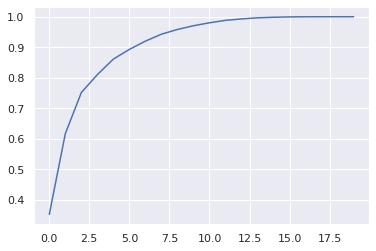

In [10]:
var_ratio = pca.explained_variance_ratio_
plt.plot(np.arange(len(var_ratio)), np.cumsum(var_ratio))

## Prepare working sets

In [11]:
GROUP_SUBSET = True

In [12]:
#features = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_specific_humidity_g_per_kg']
X_ = pd.DataFrame(X_, index=df.index, columns=all_features)

In [13]:
X_sj = X.loc['sj'].copy()
X_iq = X.loc['iq'].copy()

y_sj = y.loc['sj'].copy()
y_iq = y.loc['iq'].copy()

if GROUP_SUBSET:
    X_sj = X_sj[X_sj.index.get_level_values(0) >= 1992]
    X_sj = X_sj[X_sj.index.get_level_values(0) <= 1998]

    y_sj = y_sj[y_sj.index.get_level_values(0) >= 1992]
    y_sj = y_sj[y_sj.index.get_level_values(0) <= 1998]

## Preprocess function
Define a function which allows repetition of the preprocessing steps taken.

In [14]:
def preprocess(df):
    """
    Returns: sj, iq
    """
    df.drop(['week_start_date'], axis=1, inplace=True)
    df.set_index(['city', 'year', 'weekofyear'], inplace=True)
    
    df.fillna(method="bfill", inplace=True)
    scaler = sklearn.preprocessing.StandardScaler()
    x = scaler.fit_transform(df)
    x = pd.DataFrame(x, index=df.index, columns=df.columns)
    
    sj = x.loc['sj'].copy()
    iq = x.loc['iq'].copy()
        
    return sj, iq

# 1. Baseline

### Helper functions

In [64]:
def split_to_train(X, y, test_size=0.1):
      return train_test_split(pd.concat([X, y], axis=1), test_size=test_size)
    
def get_predictions(regressor, X):
    return regressor.predict(X)

def get_mae(regressor, X, y):
    y_pred = get_predictions(regressor, X)
    return mean_absolute_error(y_pred, y)

def fit_regressor(regressor, X, y):
    train, test = split_to_train(X, y)
    regressor.fit(X=train.drop(['total_cases'], axis=1), y=train['total_cases'])
    
    return get_mae(regressor, test.drop(['total_cases'], axis=1), test['total_cases'])

def generate_visualization(regressor, X, y):
    y_pred = regressor.predict(X)
    mae = mean_absolute_error(y, y_pred)

    plt.plot(np.arange(len(X)), y, c='r', label='data')
    plt.plot(np.arange(len(X)), y_pred, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    #plt.title("RandomForests GridSearchCV (MAE = %6.2f')" % ( mae))

    plt.show()
    return mae

def get_fold_accuracy(regressor, X, y, n_splits=10):
    fold_accuracy = []
    cv = KFold(n_splits, shuffle=False)
    for train_fold, test_fold in cv.split(X):
        X_train = X.iloc[train_fold]
        X_test = X.iloc[test_fold]
        y_train = y.iloc[train_fold]
        y_test = y.iloc[test_fold]

        regressor.fit(X=X_train, y=y_train.values.ravel())
        fold_accuracy.append(get_mae(regressor, X_test, y_test))
    return fold_accuracy

def get_accuracy(regressor, X, y, n_splits=10):
    fold_accuracy = get_fold_accuracy(regressor, X, y, n_splits)
    return sum(fold_accuracy)/len(fold_accuracy)

def generate_plot(X, y, regressor, param_name, to=30, n_split=10):
    mae = []
    for i in range(2, to):
        regressor.set_params(**{param_name:i})
        fold_accuracy = get_fold_accuracy(regressor, X, y, n_split)
        mae.append(sum(fold_accuracy)/len(fold_accuracy))

    label = type(regressor).__name__

    if type(regressor).__name__ == 'KNeighborsRegressor':
        label = regressor.get_params()['weights']
    elif type(regressor).__name__ == 'RandomForestRegressor':
        params = regressor.get_params()
        n_estimators = params['n_estimators']
        max_depth = params[param_name]
        label = f'n_estimators={n_estimators}'

    plt.plot(range(1, len(mae)+1), mae, marker='o', 
           label=label)
    print ('Min Value: {} ({})'.format(min(mae), np.argmin(mae) + 1))
    plt.xlabel(param_name)
    plt.ylabel('MAE')
    plt.legend()

def save_results(y_pred, name, index):
    res = np.rint(y_pred) # round
    res = res.astype(int) # cast to int
    aux = pd.DataFrame(np.vstack((*np.array(index.values.tolist()).T, res)).T, columns=list(index.names)+['total_cases'])
    aux.to_csv(name, index=False)
    return name

# 1.0 Select data to work on

In [27]:
X = X_sj
y = y_sj

Create list to store filenames of the prediction results.

In [34]:
result_files = []

## 1.1 KNN

### 1.1.1 Mean absolute error

Min Value: 40.00971753003004 (15)
Min Value: 39.98219874016429 (15)


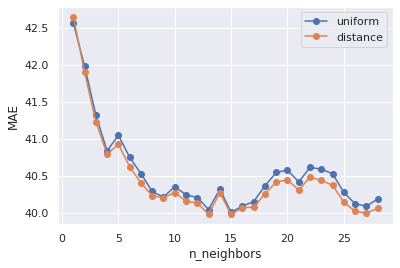

In [41]:
for weights in ['uniform', 'distance']:
    knn = neighbors.KNeighborsRegressor(weights=weights)
    generate_plot(X, y, knn, 'n_neighbors', 30, 10)
plt.show()  

### 1.1.2 Predictions

#### Model creation

In [44]:
n_neighbors = 27
weights = 'distance'
knn = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights) 

print('MAE: ', fit_regressor(knn, X, y))

MAE:  32.33006579401733


In [45]:
y_pred = get_predictions(knn, X)
y_pred.shape

(364,)

### 1.1.3 Save results

In [46]:
file_name = save_results(y_pred, 'knn_results.csv', X.index)
result_files.append(file_name)


### 1.1.4 Visualisation

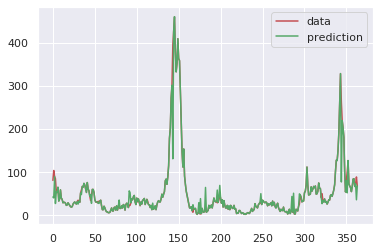

3.291792402139124

In [47]:
generate_visualization(knn, X, y)

## 1.2 Decision Tree

### 1.2.1 Mean absolute error

Min Value: 31.62157681860632 (2)


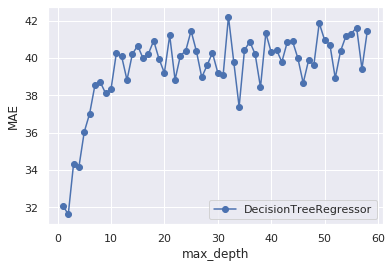

In [50]:
dt = DecisionTreeRegressor()
generate_plot(X, y, dt, 'max_depth', 60, 10)
plt.show()

### 1.2.2 Predictions

In [60]:
dt = DecisionTreeRegressor(max_depth=3)
fit_regressor(dt, X, y)

26.55522513320266

In [61]:
y_pred = get_predictions(dt, X)

### 1.2.3 Save results

In [62]:
file_name = save_results(y_pred, 'DecisionTree_results.csv', X.index)
result_files.append(file_name)

TypeError: save_results() missing 1 required positional argument: 'index'

### 1.2.4 Visualisation

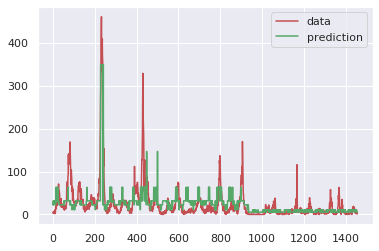

16.587608311538702

In [24]:
generate_visualization(dt, X, y)

## 1.3 Random forest

### 1.3.1 Mean absolute error

Min Value: 19.08729215871516 (1)
Min Value: 18.977750747913714 (1)
Min Value: 18.709629782711385 (1)
Min Value: 18.60548275862069 (1)
Min Value: 18.506023067233507 (1)
Min Value: 18.621184627842634 (1)


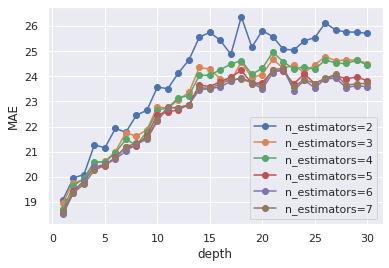

In [25]:
max_estimators = 8
max_max_depth = 32
for n in range(2, max_estimators):
    rf = RandomForestRegressor(n_estimators=n, criterion='mae', random_state=0)
    generate_plot(X, y, rf, 'max_depth', max_max_depth, 10)
plt.xlabel('depth')
plt.show()

### 1.3.2 Predictions

In [26]:
rf = RandomForestRegressor(n_estimators=4, max_depth=3, criterion='mae', random_state=0)
fit_regressor(rf, X, y)

16.21232876712329

In [27]:
y_pred = get_predictions(rf, X)

### 1.3.3 Save results

In [28]:
file_name = save_results(y_pred, 'RandomForest_results.csv')
result_files.append(file_name)

### 1.3.4 Visualisation

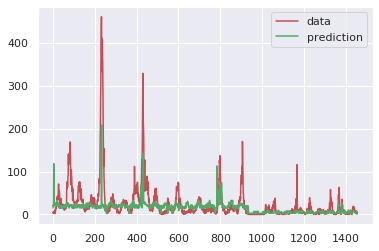

16.905906593406595

In [29]:
generate_visualization(rf, X, y)

# 2. Optimization

## Helper functions

In [30]:
def report(results, n_top=3): 
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}\n".format(results['params'][candidate]))

## 2.1 Boosting

In [31]:
regressor_names = ['KNN', 'Decision tree', 'Random Forest', 'Ada Boost', 'GradientBoosting']
regressors = [KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights),
              DecisionTreeRegressor(max_depth=6),
              RandomForestRegressor(n_estimators=4, max_depth=3,
                                    criterion='mae',random_state=0),
              AdaBoostRegressor(RandomForestRegressor(n_estimators=4, 
                                max_depth=3, criterion='mae', random_state=0)),
              GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                   max_depth=4, random_state=0, loss='ls')]

In [32]:
for i, reg in enumerate(regressors):
    print(f'{regressor_names[i]}:\n\tMAE:{get_accuracy(reg, X, y, 12)}')

KNN:
	MAE:21.958372849207425
Decision tree:
	MAE:21.36836670246984
Random Forest:
	MAE:19.142537991690375
Ada Boost:
	MAE:31.53953774895
GradientBoosting:
	MAE:21.052620592077204


In [33]:
regressors_df = pd.DataFrame({regressor_names[1]:regressors[1].feature_importances_, 
              regressor_names[2]:regressors[2].feature_importances_, 
              regressor_names[3]:regressors[3].feature_importances_,
              regressor_names[4]:regressors[4].feature_importances_, },
              index=all_features)

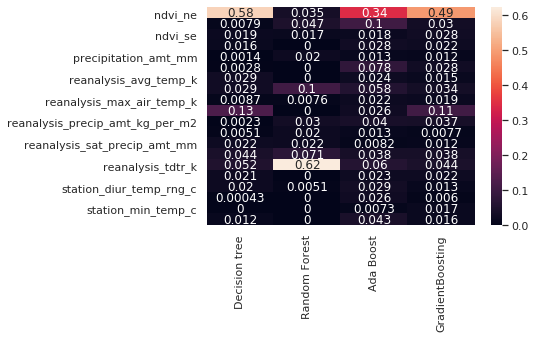

In [34]:
sns.heatmap(regressors_df, annot=True)

## 2.2 Grid Search

### 2.2.1 Setting

In [35]:
train, test = split_to_train(X, y, 0.2)
X_train = train.drop(['total_cases'], axis=1)
y_train = train['total_cases']
X_test = test.drop(['total_cases'], axis=1)
y_test = test['total_cases']

In [36]:
param_dist = {"n_estimators": [32, 64, 128], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [8, 4, 2], # Maximum number of levels in tree
              "min_samples_split": [2, 4, 6], #  Minimum number of samples required to split a node
              "min_samples_leaf": [8, 12, 16], # Minimum number of samples required at each leaf node
              "bootstrap": [True, False] # Method of selecting samples for training each tree
            }

In [37]:
rf = RandomForestRegressor()
grid_regres = GridSearchCV(estimator=rf, param_grid=param_dist, cv=5)

grid_regres.fit(X_test, y_test.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [8, 4, 2],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [8, 12, 16],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [32, 64, 128]})

### 2.2.2 Results

In [38]:
report(grid_regres.cv_results_, n_top=10)

Model with rank: 1
Mean validation score: 0.105 (std: 0.123)
Parameters: {'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'min_samples_split': 4, 'n_estimators': 32}

Model with rank: 2
Mean validation score: 0.093 (std: 0.105)
Parameters: {'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 6, 'n_estimators': 64}

Model with rank: 3
Mean validation score: 0.092 (std: 0.095)
Parameters: {'bootstrap': False, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 32}

Model with rank: 4
Mean validation score: 0.091 (std: 0.111)
Parameters: {'bootstrap': False, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 128}

Model with rank: 5
Mean validation score: 0.088 (std: 0.108)
Parameters: {'bootstrap': False, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimat

In [39]:
grid_regres.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 16,
 'min_samples_split': 4,
 'n_estimators': 32}

In [40]:
get_mae(grid_regres.best_estimator_, X, y)

19.789522936467524

### 2.2.3 Visualisation

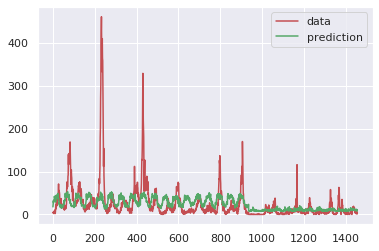

19.789522936467524

In [41]:
generate_visualization(grid_regres.best_estimator_, X, y)

## 2.3 Randomized Search

### 2.3.1 Setting

In [42]:
param_dist = {"n_estimators": [4, 8, 16, 32, 64], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [16, 12, 8, 4, 2, None], # Maximum number of levels in tree
              "min_samples_split": sp_randint(2, 50), #  Minimum number of samples required to split a node
              "min_samples_leaf": sp_randint(1, 50), # Minimum number of samples required at each leaf node
              "bootstrap": [True, False], # Method of selecting samples for training each tree
              "criterion": ["mse", "mae"]}

In [43]:
rnd_regres = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                               n_iter=100, cv=5, random_state=0, n_jobs=-1)
rnd_regres.fit(X_test, y_test.values.ravel())

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse', 'mae'],
                                        'max_depth': [16, 12, 8, 4, 2, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff6b0ee9610>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff6b0e90d00>,
                                        'n_estimators': [4, 8, 16, 32, 64]},
                   random_state=0)

### 2.3.2 Results

In [44]:
report(rnd_regres.cv_results_, n_top=10)

Model with rank: 1
Mean validation score: 0.121 (std: 0.079)
Parameters: {'bootstrap': True, 'criterion': 'mae', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 18, 'min_samples_split': 2, 'n_estimators': 32}

Model with rank: 2
Mean validation score: 0.119 (std: 0.062)
Parameters: {'bootstrap': True, 'criterion': 'mae', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 30, 'n_estimators': 8}

Model with rank: 3
Mean validation score: 0.119 (std: 0.069)
Parameters: {'bootstrap': True, 'criterion': 'mse', 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 43, 'min_samples_split': 16, 'n_estimators': 64}

Model with rank: 4
Mean validation score: 0.118 (std: 0.071)
Parameters: {'bootstrap': True, 'criterion': 'mse', 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 36, 'min_samples_split': 8, 'n_estimators': 8}

Model with rank: 5
Mean validation score: 0.116 (std: 0.077)
Parameters: {'bootstrap': True, 'criterion': 'm

In [45]:
rnd_regres.best_params_

{'bootstrap': True,
 'criterion': 'mae',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 18,
 'min_samples_split': 2,
 'n_estimators': 32}

In [46]:
get_mae(rnd_regres.best_estimator_, X, y)

17.394209306318682

### 2.3.3 Visualisation

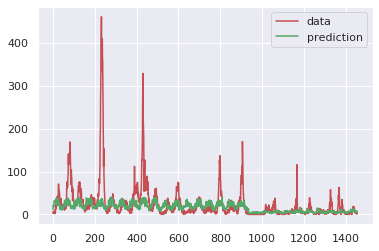

17.394209306318682

In [47]:
generate_visualization(rnd_regres.best_estimator_, X, y)

# Select best regressor for submission

In [48]:
best_regressor_sj = rf
best_regressor_iq = rf

# Submission
Run prediction with best estimator and create submittable result for datadriven competition.

In [88]:
test = pd.read_csv('dengue_features_test.csv')

X_sj, X_iq = preprocess(test)

In [50]:
df.drop(['week_start_date'], axis=1, inplace=True)
df.set_index(['city', 'year', 'weekofyear'], inplace=True)
df.shape

(416, 20)

In [51]:
df.isna().sum()
# ffill: propagate last valid observation forward to next valid backfill
# @ Check other methods
df.fillna(method="bfill", inplace=True)
df.isna().sum()

ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

In [52]:
scaler = sklearn.preprocessing.StandardScaler()
#scaler = sklearn.preprocessing.MinMaxScaler()
X = scaler.fit_transform(df)

In [53]:
#features = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_specific_humidity_g_per_kg']
X = pd.DataFrame(X, index=df.index, columns=all_features)

In [54]:
X.head()

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                           
sj   2008 18         -0.827494 -1.021792 -1.330093 -1.203512   
          19         -0.822001 -0.975896 -1.592230 -1.409221   
          20         -0.721295 -1.028618 -0.717326 -1.199933   
          21         -0.365465 -1.028618 -1.056371 -0.827883   
          22         -0.365465 -0.607077 -1.842841 -1.370008   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   2008 18                      1.150400              -0.220110   
          19                     -0.728707              -0.231811   
          20                     -0.981948               0.437065   
          21                     -1.086090               0.596972   
          22                     -1.064465               0.658399   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   2008 18                      -0.612498                    -0.580271   
          19                      -0.607018                    -0.666536   
          20                       0.006678                    -0.067370   
          21                       0.291608                    -0.661848   
          22                       0.247773                    -0.427432   

                      reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
city year weekofyear                                                         
sj   2008 18                          -0.810905                   0.239043   
          19                          -0.907794                   0.348040   
          20                          -0.455644                   0.239043   
          21                          -0.197272                   0.420705   
          22                          -0.423348                   0.566034   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   2008 18                                -0.341286   
          19                                -0.413850   
          20                                -0.776877   
          21                                -0.816234   
          22                                -0.771958   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   2008 18                                     -0.501039   
          19                                     -0.575909   
          20                                     -0.570478   
          21                                     -1.283880   
          22                                     -1.138795   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   2008 18                              1.150400   
          19                             -0.728707   
          20                             -0.981948   
          21                             -1.086090   
          22                             -1.064465   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   2008 18                                      -0.642011   
          19                                      -0.723614   
          20                                      -0.156981   
          21                                      -0.733699   
          22                                      -0.501728   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   2008 18                  -0.561850           -0.675916   
          19                  -0.719527           -1.049736   
          20                  -0.193938            0.468905   
          21                  -0.218196

In [55]:
y_pred = get_predictions(best_regressor, X)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.